[View in Colaboratory](https://colab.research.google.com/github/sthalles/tensorflow-tutorials/blob/master/MNIST_ConvNet_Solution.ipynb)

# Exploring the New Eager Execution TensorFlow API

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.examples.tutorials.mnist import input_data
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
plt.rcParams["axes.grid"] = False

Using TensorFlow backend.


# Deep Learning

Deep Learning is a branch of machine learning focused on building algorithms that learn data representations (instead of task-specific solutions) 

Deep Learning is **state-of-the-art** in almost all **perception** problem: 

- Natural Language Processing (NLP)
- Voice Recognition
- Computer Vision

Deep Learning is a **family of methods**:
- Feedforward Network
- Convolutional Nets
- Recurrent Nets
- Auto-Encoders
- Generative Adversarial Networks
- etc...

# TensorFlow Eager Execution

Eager execution is a new **high-level TF API** that lets users execute tensors in real time (**Imperative**) fashion. 

- Brings TF to the level of some other Deep Learning frameworks like PyTorch and Chainer.
- Run TF models just like any other python code (Numpy and python objects compliant)
- Don't think about Computational Graphs - Just execute code normally 
- Allows for **real-time python** Debugging
- To enable Eager Execution - just run: **tf.enable_eager_execution()**

## Exercise

1- Enable eager execution mode using *tf.enable_eager_execution()*.

In [0]:
# Enable eager execution mode
tfe = tf.contrib.eager

## YOUR CODE GOES HERE
tf.enable_eager_execution()

In [0]:
if tf.executing_eagerly():
    print("Eager is Enabled!")

Eager is Enabled!


# Computer Vision 101 with MNIST 

## Exploring the MNIST dataset

Computer Vision is a branch of AI devoted to building algorithms that enable machines to perceive the world. 

MNIST is a simple computer vision dataset. It consists **greyscale images of handwritten digits** like these.

The MNIST dataset is composed of **60000 thousand images**. *50000* for training and *10000* for testing.

![alt text](https://www.tensorflow.org/versions/r1.1/images/MNIST-Matrix.png)

## Numerical Stabilization

Any time we are up to doing some calculus on a computer, we need to think about representation.
- We all know, machines are **memory-limited**

In [2]:
a = 1000000000 # one billion
b = 0.000001
for i in range(1000000): # should and 1 (in total) to a. Right??
  a += b

print("a:", a)
print("a - 1000000000:", a - 1000000000)

a: 1000000000.9536743
a - 1000000000: 0.95367431640625


Try now to substitute the 1000000000 (one billion) to just one.

What do you see? 

When calculating the grandients and the loss, we do NOT want their values to get too **BIG** or too **SMALL**.
- **Facilitates the job of the optimizer** (find the best spot in the error function)
- Makes convergence FASTER and reduces the probability of **DIVERGENCE**.

**That is why normalization is important.**

## Load MNIST data

In [0]:
# Download the mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Exercise

Like we did before, divide the training data into train and validation sets.

- You may use: [train_test_split()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Choose a reasonable value for the split fraction.

In [0]:
## YOUR CODE GOES HERE
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Visualize the dataset Shape and Stats

In [0]:
print("Train shape:", X_train.shape)
print("Train labels:", y_train.shape)
print("Validation shape:", X_val.shape)
print("Validation labels:", y_val.shape)
print("Test shape:", X_test.shape)
print("Test labels:", y_test.shape)

Train shape: (48000, 28, 28)
Train labels: (48000,)
Validation shape: (12000, 28, 28)
Validation labels: (12000,)
Test shape: (10000, 28, 28)
Test labels: (10000,)


## Exercise

Build the **normalizer()** function above. Our goal is to keep the values between a small range.

1. Option 1: Dvide the image pixels by 255. What does it mean?
2. Option 2: Subtract each pixel by 128 and divide by 128. 

In [0]:
def normalizer(image, label):
  """
  TODO: Finish the normalizer function
  """
  return tf.to_float(image) / 255., label

Train: [4748. 5420. 4784. 4912. 4666. 4317. 4741. 4966. 4691. 4755.]
Test: [ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


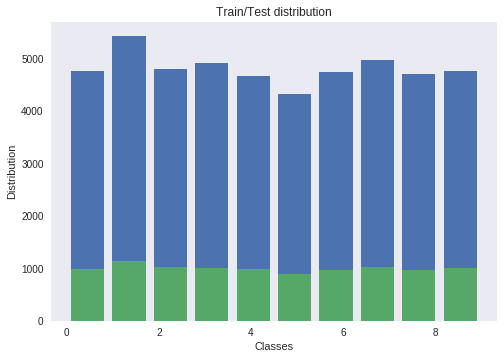

In [0]:
## Visualize the dataset distribution

import pylab as P
n, bins, patches = P.hist(y_train, bins=10, histtype="bar", rwidth=0.8)
print("Train:", n)
n, bins, patches = P.hist(y_test, bins=10, histtype="bar", rwidth=0.8 )
print("Test:", n)
P.xlabel('Classes')
P.ylabel('Distribution')
P.title('Train/Test distribution')
P.show()

In [0]:
print("Max value:", np.max(X_train[0]))
print("Min value:", np.min(X_train[0]))
print("Mean:", np.mean(X_train[0]))
print("Std:", np.std(X_train[0]))

Max value: 255
Min value: 0
Mean: 32.81887755102041
Std: 76.27195468984321


## Visualize some MNIST images

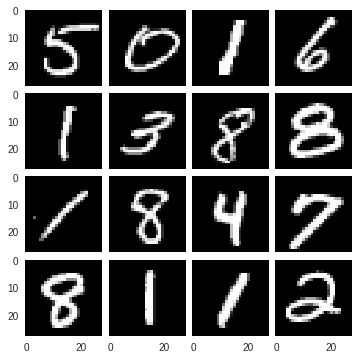

In [0]:
fig = plt.figure(1, (6., 6.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(16):
    grid[i].imshow(X_train[i], cmap="gray")  # The AxesGrid object work as a list of axes.

plt.show()

## Building Tensorflow Model


![alt text](http://cs231n.github.io/assets/cnn/convnet.jpeg)

The basic architecture follows a simple sequence of operations.
1. Convolution
2. Activation function
3. Pooling
4. Fully-Connected layers 

In the end, we usually apply some fully-connected layers to build the classification layer.

Refer to these links for full documentations:

- [Keras Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Keras Activation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation)
- [Keras MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
- [Keras Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)


![LeNet-5](https://world4jason.gitbooks.io/research-log/content/deepLearning/CNN/img/lenet.png)


### Convolutions and Non-linearity

The convolution is a linear operation that looks for correlation in a** grid-like neighborhood**. 

Its main advantage is that we do not need to set up the kernels
- The network will learn them for us.

Also, they are very memory efficient.
- They **share parameters** across space.

![Convolution](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)

Non-linearity is what makes DNN cool.

ReLU (rectified linear Unit) is one of the most simple functions one can think of.
- Yet, they do just what we need. **Non-linearity** and **Differentiability**.

![NonLinearity](https://tiny.colaflycdn.com/static/img/learn/relu.png)

### Exercise:

Build your own DNN using eager execution.

Hint: Use the [Keras layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) built into Tensorflow.

In [0]:
class MNISTModel(tf.keras.Model):
    
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1),
                                            padding='same', activation=tf.nn.relu, use_bias=True)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same")
        self.flatten = tf.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
        self.logits = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        conv1 = self.conv1(inputs)
        pool1 = self.pool1(conv1)
        flat = self.flatten(pool1)
        fc1 = self.fc1(flat)
        logits = self.logits(fc1)
        return logits

# Loss

The loss function (or objective) is responsible for measuring how **good/bad** our classifier is doing. 

There are many loss functions.

For **multiclass problems**, we usually use the **cross-entropy** function.

The cross-entropy loss (log-loss) is used to measure the performance of a classifier that outputs probabilities.

![alt text](https://github.com/sthalles/tensorflow-tutorials/blob/master/images/cross_entropy.png?raw=true)

- The cross-entropy **increases** when the predicted value deviates from the true values and **decreases** otherwise.

One-hot encoding is a form of representing categorical data so that each category (class) contains the same power (magnitude) over one another.

![One-hot encodding representation](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRo9fhLj8UpmziNvD_eifQ3SkjybaaGmlfLd5Z2fsDn3XaASUoWw)

### Exercise:

Finish the **loss()** function bellow.

1. Remember, our labels are vectors. *Example: [0, 3, 2, 5, 6, ..., 5]*. 

2. Each number represents the image corresponding class. However, in order to make the labels equally valued, we need to convert them to binary representations (**one-hot-encoding**).

3. Use the [tf.one_hot()](https://www.tensorflow.org/api_docs/python/tf/one_hot) function to convert the labels to the proper format.

4. For the cross-entropy loss you can choose to **write it your self** or use the built-in [tf.nn.softmax_cross_entropy_with_logits_v2()](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2). 

  - If you take the challenge of writing it, [tf.multiply()](https://www.tensorflow.org/api_docs/python/tf/multiply) and [tf.log()](https://www.tensorflow.org/api_docs/python/tf/log) will help. 

In [0]:
def loss(logits, labels):
  # YOUR CODE GOES HERE
  labels_one_hot = tf.one_hot(labels, 10)
  
  # cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels_one_hot, logits=logits)
  # print(cross_entropy.shape)

  cross_entropy = tf.multiply(labels_one_hot, tf.log(tf.nn.softmax(logits))) # element wise multiplication
  return - tf.reduce_mean(cross_entropy)

## Exercise - Hyperparameters


Tune the hyperparameters bellow.
- Remember: The learning rate controls how fast your model learns. 
- A bigger learning rate might get you to a sub-optimal objective faster, but you might **overshoot the target.**

In [0]:
## CODE GOES HERE
epochs = 1
batch_size = 32
learning_rate = 0.001

# Optimizers

The Optimizer is the algorithm responsible for applying the gradients to the Model's weight variables. 

Imagine a curved surface (just an example), the goal is to find the minimal value of that surface. 

The Gradient points to the direction of **steepest ascent**. Thus, we follow the opposite direction of the gradient (**steepest descent**).

These are some of the Optimizers available in Tensorflow

- **AdadeltaOptimizer**: Optimizer that implements the Adadelta algorithm.

- **AdagradOptimizer**: Optimizer that implements the Adagrad algorithm.

- **AdamOptimizer**: Optimizer that implements the Adam algorithm.

- **GradientDescentOptimizer**: Optimizer that implements the gradient descent algorithm.

- **MomentumOptimizer**: Optimizer that implements the Momentum algorithm.

[Tensorflow Build-in Optimizers](https://www.tensorflow.org/versions/r1.2/api_docs/python/tf/train)

## Exercise:

1. Pick one of these optimizers and  use it to minimize the loss function for your model.


![alt text](https://cs231n.github.io/assets/nn3/opt1.gif)

In [0]:
# Choose one of the optimizers and set an initial learning rate
# CODE GOES HERE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [0]:
# Create the model
model = MNISTModel()

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.map(normalizer)
dataset = dataset.shuffle(1000) # shuffle before each epoch and bufferize some data
dataset = dataset.repeat(epochs) # number of epochs
dataset = dataset.batch(batch_size) # batch size

## Exercise

Finish the training loop. The mean part if the **Gradient Tape**. It accumulates gradients for a batch.

Inside the **GradientTape()** scope:
1. Compute the logits, run a forward pass through the model.
2. Use the logits to compute the loss value i.e. call the **loss()** function.
3. Outside of the **GradientTape()** scope compute the **gradient of the loss with respect to the weights**.

In [0]:
train_epoch_loss_avg = tfe.metrics.Mean()
train_epoch_accuracy = tfe.metrics.Accuracy()

for (step, (images, labels)) in enumerate(tfe.Iterator(dataset)):
  
  with tfe.GradientTape() as tape:
    logits = model(tf.expand_dims(images, axis=3))
    loss_value = loss(logits, labels)
    
  grads = tape.gradient(loss_value, model.variables)
  optimizer.apply_gradients(zip(grads, model.variables),
                            global_step=tf.train.get_or_create_global_step())
  
  train_epoch_loss_avg(loss_value)
  train_epoch_accuracy(tf.cast(tf.argmax(logits, axis=1), tf.uint8), labels)
  
  if step % 100 == 0:
    val_logits = model(tf.expand_dims(tf.cast(X_val,tf.float32), axis=3))
    val_predictions = tf.argmax(val_logits, axis=1)
    print("Training loss: {: .3}\tTrain Accuracy: {: .3}\tValidation Accuracy: {: .3}".format(train_epoch_loss_avg.result(), train_epoch_accuracy.result(), accuracy_score(val_predictions, y_val)))

tf.Tensor(
[-0.        -2.2056406 -0.        -0.        -0.        -0.
 -0.        -0.        -0.        -0.       ], shape=(10,), dtype=float32)
-----------
tf.Tensor(
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.], shape=(32,), dtype=float32)
(32,)
-----------------------------
Training loss:  0.231	Train Accuracy:  0.0938	Validation Accuracy:  0.326
tf.Tensor(
[-0.        -2.5244894 -0.        -0.        -0.        -0.
 -0.        -0.        -0.        -0.       ], shape=(10,), dtype=float32)
-----------
tf.Tensor(
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.], shape=(32,), dtype=float32)
(32,)
-----------------------------
tf.Tensor(
[-0.        -0.        -2.2754185 -0.        -0.        -0.
 -0.        -0.        -0.        -0.       ], shape=(10,), dtype=float32)
-----------
tf.Tensor(
[-0. -0. -0. -0. -0. -0. -0

tf.Tensor(
[-0.        -0.        -1.3057154 -0.        -0.        -0.
 -0.        -0.        -0.        -0.       ], shape=(10,), dtype=float32)
-----------
tf.Tensor(
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.], shape=(32,), dtype=float32)
(32,)
-----------------------------
tf.Tensor(
[-0.         -0.         -0.         -0.07089016 -0.         -0.
 -0.         -0.         -0.         -0.        ], shape=(10,), dtype=float32)
-----------
tf.Tensor(
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.], shape=(32,), dtype=float32)
(32,)
-----------------------------
tf.Tensor(
[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.17860323 -0.         -0.        ], shape=(10,), dtype=float32)
-----------
tf.Tensor(
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -

KeyboardInterrupt: ignored

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def normalized_acc(conf_matrix):
    for i in range(conf_matrix.shape[0]):
        print("Acc class {0} --> {1: .3}".format(i, conf_matrix[i,i]/sum(conf_matrix[i])))

## Evaluation

Run the trained model using the testing dataset.

In [0]:
test_logits = model(tf.expand_dims(tf.cast(X_test,tf.float32), axis=3))
test_predictions = tf.argmax(test_logits, axis=1)
print("Test Overall Accuracy: {: .3}".format(accuracy_score(test_predictions, y_test)))

Test Overall Accuracy:  0.87


Confusion matrix, without normalization


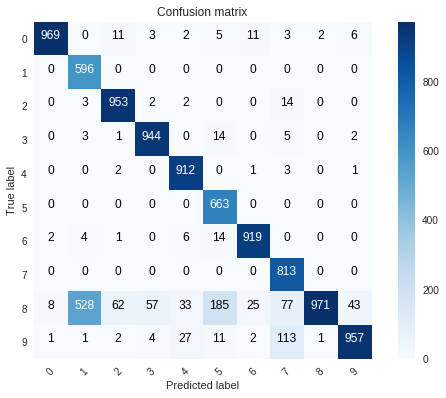

In [0]:
conf_matrix = confusion_matrix(test_predictions, y_test)
_ = plot_confusion_matrix(conf_matrix, classes=[str(i) for i in range(10)])

In [0]:
normalized_acc(conf_matrix)

Acc class 0 -->  0.958
Acc class 1 -->  1.0
Acc class 2 -->  0.978
Acc class 3 -->  0.974
Acc class 4 -->  0.992
Acc class 5 -->  1.0
Acc class 6 -->  0.971
Acc class 7 -->  1.0
Acc class 8 -->  0.488
Acc class 9 -->  0.855
